In [1]:
from keras.datasets import mnist


In [2]:
data = mnist.load_data()

In [3]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

In [5]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
#from keras.datasets import mnist
from keras.models import Sequential,load_model
from keras.layers.core import Dense,Dropout,Activation
from keras.utils import np_utils
%matplotlib inline

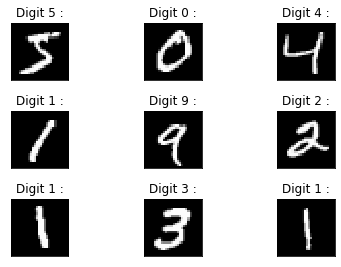

In [6]:
new = plt.figure()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i],cmap='gray',interpolation='none')
    plt.title("Digit {} :".format(Y_train[i]))
    plt.xticks([])
    plt.yticks([])


Text(0.5, 1.0, 'Pixel Value Distribution')

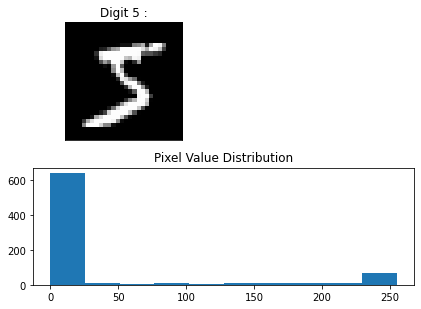

In [7]:
digit_5 = plt.figure()

plt.subplot(2,2,1)
plt.tight_layout()
plt.imshow(X_train[0],cmap='gray',interpolation='none')
plt.title("Digit {} :".format(Y_train[0]))
plt.xticks([])
plt.yticks([])

plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title('Pixel Value Distribution')


In [8]:
# Let's print the shape before normalize
print('Original Size of the data')
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('Y_train shape :', Y_train.shape)
print('Y_test shape :', Y_test.shape)

#Building the input vector from the 28*28 pixels

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

#Normalize the data to help with the training

X_train /= 255
X_test /= 255

#Print the final output shape ready for Training
print("Train matrix shape :", X_train.shape)
print("Test matrix shape :", X_test.shape)

Original Size of the data
X_train shape : (60000, 28, 28)
X_test shape : (10000, 28, 28)
Y_train shape : (60000,)
Y_test shape : (10000,)
Train matrix shape : (60000, 784)
Test matrix shape : (10000, 784)


In [9]:
# One-hot encoding for target column

n_classes = 10
print('Shape before one-hot encoding :', Y_train.shape)

Y_train = np_utils.to_categorical(Y_train,n_classes)
Y_test = np_utils.to_categorical(Y_test,n_classes)

print('Shape after one-hot encoding :', Y_train.shape)

Shape before one-hot encoding : (60000,)
Shape after one-hot encoding : (60000, 10)


In [10]:
model = Sequential()

# 1st Hidden Layer
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))

# 2nd Hidden Layer
model.add(Dense(784))
model.add(Activation('relu'))

# 3rd hidden Layer
model.add(Dense(128))
model.add(Activation('relu'))

# Model Output
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 784)               402192    
                                                                 
 activation_1 (Activation)   (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [14]:
import keras

In [12]:
batch_size = 32
num_classes = 10
epochs = 12

#input image dimenssions
img_row, img_cols = 28,28

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

model.fit(X_train,Y_train,
         batch_size=batch_size,
          epochs=epochs,
         verbose=1,
         validation_data=(X_test,Y_test))

Epoch 1/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1927 - accuracy: 0.9413 - val_loss: 0.1022 - val_accuracy: 0.9695
Epoch 2/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0912 - accuracy: 0.9728 - val_loss: 0.0810 - val_accuracy: 0.9759
Epoch 3/12
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0648 - accuracy: 0.9805 - val_loss: 0.0925 - val_accuracy: 0.9707
Epoch 4/12
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0863 - val_accuracy: 0.9763
Epoch 5/12
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0890 - val_accuracy: 0.9772
Epoch 6/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0994 - val_accuracy: 0.9771
Epoch 7/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0837 -

In [16]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.09845342487096786
Test accuracy : 0.9821000099182129
